<a href="https://colab.research.google.com/github/muhammadfarhat2024/googlecolab/blob/main/wadidau.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# muhammad farhat rafsanjani
# rafirafsanjani394@gmail.com
!wget https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip
!unzip rockpaperscissors.zip -d rockpaperscissors


Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: rockpaperscissors/rockpaperscissors/scissors/KNNsNhduqSfuqEK5.png  
  inflating: rockpaperscissors/__MACOSX/rockpaperscissors/scissors/._KNNsNhduqSfuqEK5.png  
  inflating: rockpaperscissors/rockpaperscissors/scissors/xAnfzBYnsnuru9Nf.png  
  inflating: rockpaperscissors/__MACOSX/rockpaperscissors/scissors/._xAnfzBYnsnuru9Nf.png  
  inflating: rockpaperscissors/rockpaperscissors/scissors/caj9PiWZ2BenuxXF.png  
  inflating: rockpaperscissors/__MACOSX/rockpaperscissors/scissors/._caj9PiWZ2BenuxXF.png  
  inflating: rockpaperscissors/rockpaperscissors/scissors/5CzwWCDnxKOJz5T0.png  
  inflating: rockpaperscissors/__MACOSX/rockpaperscissors/scissors/._5CzwWCDnxKOJz5T0.png  
  inflating: rockpaperscissors/rockpaperscissors/scissors/7dBQ0fOpCs03OmnR.png  
  inflating: rockpaperscissors/__MACOSX/rockpaperscissors/scissors/._7dBQ0fOpCs03OmnR.png  
  inflating: rockpaperscissors/rockpaperscissors/scissors/DXQaN15KphkE4i7z.p

In [ ]:
import os
from PIL import Image, UnidentifiedImageError

def validate_images(directory):
    valid_files = []
    invalid_files = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                file_path = os.path.join(root, file)
                try:
                    with Image.open(file_path) as img:
                        img.verify()  # Verifikasi bahwa file gambar tidak rusak
                        valid_files.append(file_path)
                except (IOError, UnidentifiedImageError) as e:
                    print(f'Gambar rusak atau tidak valid: {file_path}')
                    invalid_files.append(file_path)
    return valid_files, invalid_files

# Memvalidasi gambar dan mendapatkan daftar file yang valid
train_dir = 'rockpaperscissors/rockpaperscissors/rps-cv-images'
valid_image_files, invalid_image_files = validate_images(train_dir)
print(f'Jumlah gambar valid: {len(valid_image_files)}')
print(f'Jumlah gambar tidak valid: {len(invalid_image_files)}')


Jumlah gambar valid: 2188
Jumlah gambar tidak valid: 0


In [ ]:
import shutil

# Membuat direktori sementara untuk menyimpan gambar yang valid
valid_dir = 'rockpaperscissors/valid_images'
if not os.path.exists(valid_dir):
    os.makedirs(valid_dir)

# Salin gambar valid ke direktori sementara
for file_path in valid_image_files:
    shutil.copy(file_path, valid_dir)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path direktori
data_dir = 'rockpaperscissors/rockpaperscissors/rps-cv-images'

# Membuat data generator dengan augmentasi gambar
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.4  # Membagi dataset dengan 40% untuk validasi
)

# Data generator untuk pelatihan
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Data generator untuk validasi
validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Print informasi tentang generator untuk verifikasi
print(f"Jumlah gambar pelatihan: {train_generator.samples}")
print(f"Jumlah gambar validasi: {validation_generator.samples}")
print(f"Jumlah kelas: {train_generator.num_classes}")


Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.
Jumlah gambar pelatihan: 1314
Jumlah gambar validasi: 874
Jumlah kelas: 3


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Membangun model neural network sequential
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(3, activation='softmax')
])

# Menyusun model dengan optimizer dan loss function yang tidak diajarkan di kelas
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,454,147 (13.18 MB)

 Trainable params: 3,454,147 (13.18 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Pastikan ukuran batch
batch_size = 32

# Cek data generator
print(f"Jumlah batch pada train_generator: {train_generator.samples // batch_size}")
print(f"Jumlah batch pada validation_generator: {validation_generator.samples // batch_size}")

# Melatih model dengan data generator
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32
)


Jumlah batch pada train_generator: 41
Jumlah batch pada validation_generator: 27
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.3433 - loss: 1.1025 - val_accuracy: 0.4294 - val_loss: 1.0585
Epoch 2/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4062 - loss: 1.0995 - val_accuracy: 0.3000 - val_loss: 1.1358
Epoch 3/20


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


41/41 ━━━━━━━━━━━━━━━━━━━━ 138s 2s/step - accuracy: 0.4603 - loss: 1.0435 - val_accuracy: 0.5324 - val_loss: 1.0055
Epoch 4/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4688 - loss: 0.9741 - val_accuracy: 0.7000 - val_loss: 0.8634
Epoch 5/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.5754 - loss: 0.9451 - val_accuracy: 0.6759 - val_loss: 0.8145
Epoch 6/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5938 - loss: 0.7968 - val_accuracy: 0.7000 - val_loss: 0.8268
Epoch 7/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.7351 - loss: 0.7341 - val_accuracy: 0.7454 - val_loss: 0.6505
Epoch 8/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7500 - loss: 0.6622 - val_accuracy: 1.0000 - val_loss: 0.2819
Epoch 9/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.7773 - loss: 0.5613 - val_accuracy: 0.8252 - val_loss: 0.4837
Epoch 10/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8125 - loss: 0.4070 - val_accuracy: 0.9000 - val_loss: 0.276

Saving 0CSaM2vL2cWX6Cay.png to 0CSaM2vL2cWX6Cay (2).png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


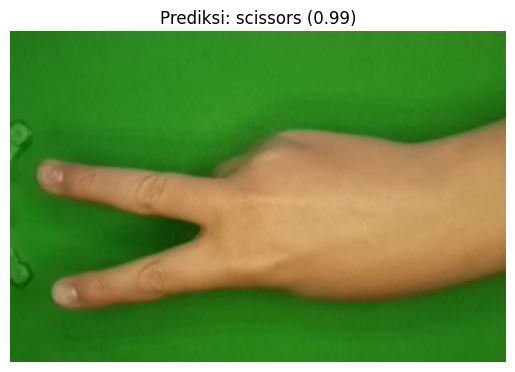

Gambar dikenali sebagai: scissors dengan probabilitas 0.99.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Fungsi untuk memprediksi gambar dan menangani kategori tak dikenal
def predict_image(img_path):
    # Memuat gambar dan mengubah ukurannya
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Tambahkan batch dimension
    img_array = img_array / 255.0  # Normalisasi

    # Melakukan prediksi
    predictions = model.predict(img_array)
    class_names = ['peper', 'rock', 'scissors']

    # Menentukan kelas dengan probabilitas tertinggi
    predicted_class = class_names[np.argmax(predictions)]
    predicted_prob = np.max(predictions)

    # Menampilkan gambar dan hasil prediksi
    plt.imshow(image.load_img(img_path))
    plt.title(f'Prediksi: {predicted_class} ({predicted_prob:.2f})')
    plt.axis('off')
    plt.show()

    # Menangani prediksi dengan probabilitas rendah sebagai 'Unknown'
    if predicted_prob < 0.5:
        print(f'Gambar tidak dapat dikenali dengan pasti. Probabilitas untuk {predicted_class} adalah {predicted_prob:.2f}.')
    else:
        print(f'Gambar dikenali sebagai: {predicted_class} dengan probabilitas {predicted_prob:.2f}.')

# Contoh penggunaan fungsi
from google.colab import files
uploaded = files.upload()  # Mengunggah gambar
for img_path in uploaded.keys():
    predict_image(img_path)
